# Image Classification Comparison of Methods

In this project I will be running and comparing three classification methods K Nearest Neighbours, Naïve Bayes Algorithm and Multimonial Logistic Regression on the fashion MNIST dataset.

Import Libraries

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy
import pandas as pd
import math
import copy
import time
from datetime import datetime

import os
print(os.listdir("./input/train"))

['images_training.h5', 'labels_training.h5']


In [2]:
with h5py.File('./input/train/images_training.h5','r') as H:
    data_train = np.copy(H['datatrain'])
with h5py.File('./input/train/labels_training.h5','r') as H:
    label_train = np.copy(H['labeltrain'])
    
# using H['datatest'], H['labeltest'] for test dataset.
print(data_train.shape,label_train.shape)

(30000, 784) (30000,)


Showing a sample data. The first example belongs to class 0: T-Shirt/Top

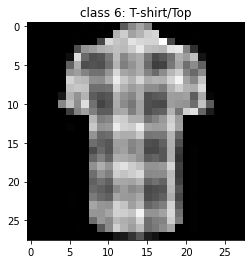

In [3]:
data_train_sample = data_train.reshape((data_train.shape[0], 28, 28))
plt.imshow(data_train_sample[0], cmap=plt.get_cmap('gray'))
plt.title("class " + str(label_train[0]) + ": T-shirt/Top" )
plt.show()

Import test data. Images are scaled between 0 and 1 with 0 representing white and 1 representing black.

In [5]:
np.max(data_train[0])

1.0

Top 10 Images

In [6]:
print(label_train)

label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

[6 0 1 ... 1 2 2]


## Preprocessing Steps

1. Calculate the mean of the training sample
2. Apply standardisation of the train and test data by subtracting the mean
3. Apply EVD to the dataset
2. Pick the number of eigenvectors to reduce the dimensionality of the data and explain >90% of the image variance.

In [7]:
X = data_train - np.mean(data_train,axis=0)
U, s, Vt = scipy.linalg.svd(X, full_matrices=False)

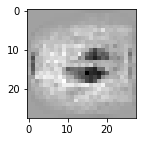

In [8]:
def showimg(imvec):
    plt.figure(figsize=(2,2))
    img = np.reshape(imvec,(28,28)) # convert vectorized data point t 
    plt.imshow( img.T , cmap="gray") 

mean_image = np.apply_along_axis(np.mean, 0, X)
showimg(mean_image)

In [9]:
# To initialise the different values of k/dimensions
# Source: https://www.math.uci.edu/~isik/teaching/17W_MATH9/notes/Lecture25.html
X = data_train - np.mean(data_train,axis=0)
U, s, Vt = scipy.linalg.svd(X, full_matrices=False)
W = U.dot(np.diag(s))
approxes = [W[:,:k].dot(Vt[:k,:]) for k in [1,10,50,100,200,500]]

How much does eigenvectors best approximates the images?
100 eigenvectors appears sufficient to capture the main components of the images

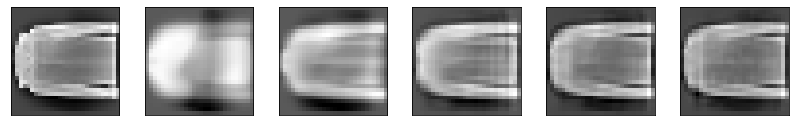

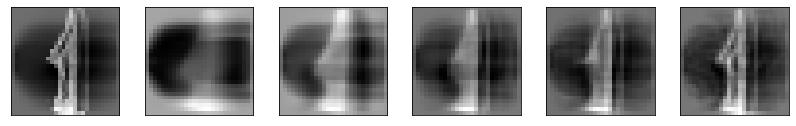

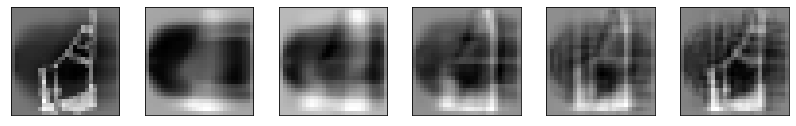

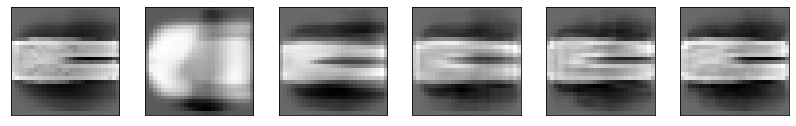

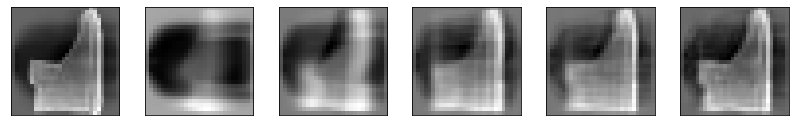

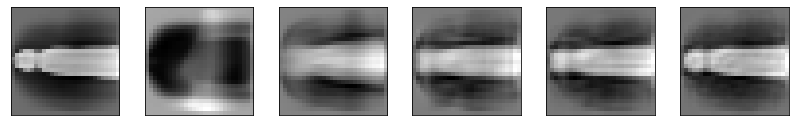

In [10]:
number_image=100
for i in range(number_image,number_image+6):
    im1 = X[i,:] - mean_image
    im2 = approxes[0][i , : ]
    im3 = approxes[1][i , : ]
    im4 = approxes[2][i , : ]
    im5 = approxes[3][i , : ]
    im6 = approxes[4][i , : ]
    fig, axes = plt.subplots(1, 6, figsize=(14,2),subplot_kw={'xticks': [], 'yticks': []})
    axx = axes.flat
    img = np.reshape(im1,(28,28)) # convert vectorized data point t
    axx[0].imshow(img.T, cmap="gray")
    img = np.reshape(im2,(28,28)) # convert vectorized data point t
    axx[1].imshow(img.T, cmap="gray")
    img = np.reshape(im3,(28,28)) # convert vectorized data point t
    axx[2].imshow(img.T, cmap="gray")
    img = np.reshape(im4,(28,28)) # convert vectorized data point t
    axx[3].imshow(img.T, cmap="gray")
    img = np.reshape(im5,(28,28)) # convert vectorized data point t
    axx[4].imshow(img.T, cmap="gray")
    img = np.reshape(im6,(28,28)) # convert vectorized data point t
    axx[5].imshow(img.T, cmap="gray")

In [11]:
train_svd = data_train - np.mean(data_train,axis=0)
test_svd = data_test - np.mean(data_train,axis=0)

# Singular-value decomposition
U, s, Vt = np.linalg.svd(train_svd, full_matrices=False)
S = np.diag(s)

var = np.transpose(S).dot(S) # calculate variance
tot_var = np.sum(np.diag(var)) # calculate total variance
prop_var = np.diag(var) / tot_var

#90% of variance is explained in first 100 eigenvectors
np.cumsum(prop_var[0:100])

array([0.29077053, 0.468063  , 0.5282023 , 0.5775688 , 0.61584735,
       0.6503534 , 0.6739511 , 0.6927125 , 0.7062683 , 0.71936595,
       0.72922844, 0.73833823, 0.7460148 , 0.75259465, 0.7586697 ,
       0.76455945, 0.77011746, 0.7754284 , 0.78004336, 0.78460777,
       0.7889165 , 0.7929697 , 0.79682255, 0.8005391 , 0.8041775 ,
       0.8077132 , 0.811047  , 0.81425166, 0.81734025, 0.8202482 ,
       0.82302713, 0.825706  , 0.8283391 , 0.83089125, 0.8333651 ,
       0.83573097, 0.8380311 , 0.8402824 , 0.8424771 , 0.8445888 ,
       0.8466037 , 0.84856176, 0.85048956, 0.85231894, 0.8540603 ,
       0.8557838 , 0.8574639 , 0.8591192 , 0.86073107, 0.862286  ,
       0.86382294, 0.8653343 , 0.8668079 , 0.86824   , 0.86961585,
       0.87097967, 0.8722923 , 0.8735786 , 0.87485087, 0.8761035 ,
       0.8773289 , 0.8785299 , 0.8797151 , 0.8808809 , 0.8820341 ,
       0.8831617 , 0.8842748 , 0.88537836, 0.88643926, 0.8874936 ,
       0.8885253 , 0.88953364, 0.8905211 , 0.8914869 , 0.89243

## Eigenvalue Decomposition

As seen 90% of variance is explained in first 100 singular values, however to be safe I will choose 200 eigenvectors as through the image analysis this better captures the image shapes. I choose EVD for the final result as it seemed to produce a better classifier for Naive Bayes.

In [12]:
# Eigenvalue Decomposition
train_evd = data_train - np.mean(data_train,axis=0) # subtracting mean from training set to normalise the data
test_evd = data_test - np.mean(data_train,axis=0)

cov = np.cov(train_evd.T) / train_evd.shape[0]
S,V = np.linalg.eig(cov)
idx = S.argsort()[::-1]
S = S[idx]
V = V[:,idx]

In [13]:
# reduced feature space
n_components=200
X_hat_reconstructed=X.dot(V[:, :n_components])
data_test_reconstructed=test_evd.dot(V[:, :n_components]) # apply same dimension reduction to test data

print(data_test_reconstructed.shape)
print(X_hat_reconstructed.shape)
print(data_test_reconstructed.shape)
print(U.shape)
print(S.shape)
print(Vt.shape)

comp_ratio = (train_evd.shape[1]*n_components + n_components + train_evd.shape[0]*n_components)/(train_evd.shape[1]
                                                                                                 * train_evd.shape[0])
print('If we choose {} dominant eigenvalue/s;\n compresion ratio = {}\n\n'\
      .format(n_components, np.round(comp_ratio,10)))

(5000, 200)
(30000, 200)
(5000, 200)
(30000, 784)
(784,)
(784, 784)
If we choose 200 dominant eigenvalue/s;
 compresion ratio = 0.2617772109




In [14]:
print(X_hat_reconstructed)
print(X_hat_reconstructed.shape)

[[-1.66347483 -3.47519027 -0.20321187 ...  0.04846728 -0.0329212
   0.0117133 ]
 [-3.91329683 -3.92262378  1.70443067 ... -0.12292802 -0.03975063
  -0.02172229]
 [-2.03330226 -4.37266389  1.6298531  ...  0.02308374 -0.01590198
   0.01894908]
 ...
 [ 1.99038943 -5.20354535  0.65885024 ... -0.0312611   0.09232539
   0.14946474]
 [-6.06489987 -0.0508494  -0.5898383  ... -0.1371685  -0.10429448
  -0.03660177]
 [ 0.0502334   0.8993244  -2.31904159 ...  0.09740993  0.02000374
  -0.02520966]]
(30000, 200)


In [15]:
train_X = X_hat_reconstructed + np.mean(data_train)
test_X=data_test_reconstructed + np.mean(data_train)

## K Nearest Neighbour Classifier

KNN Classification Steps:
(data is already scaled)
1. Split the train dataset into 80% training and 20% validation data
1. Calculate the distance between a test data point and training data point
2. Sort the distances and pick K nearest neighbours
3. Given the labels of the selected K neighbors.
4. Use pandas crosstab to build confusion matrix

## Finding K from Validation Set Comparison

In [16]:
np.random.seed(5003)

#30,000 train split into 80% train 20% validation
X_train=train_X[0:25000]
X_validation=train_X[25000:30000]
y_train=label_train[0:25000]
y_validation=label_train[25000:30000]

print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(25000, 200)
(5000, 200)
(25000,)
(5000,)


In [17]:
# Accuracy of validation of KNN
def manhattan_distance(X_train, X_validation):
    return np.linalg.norm(X_validation-X_train,ord=1)

def euclidean_distance(X_train, X_validation):
    return np.linalg.norm(X_validation-X_train[i])

def cosine_distance(X_train, X_validation):
    return np.dot(X_validation,X_train)/np.linalg.norm(X_validation)/np.linalg.norm(X_train)

import operator
def get_neighbours(X_train, X_validation, k):
    distances = []
    neighbors = []    
    for i in range(0, X_validation.shape[0]):
        dist = euclidean_distance(X_train[i], X_validation)
        distances.append((i, dist))
        distances.sort(key=operator.itemgetter(1))
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def predictkNNClass(output, Y_validation):
    classVotes = {}
    for i in range(len(output)):
#         print output[i], y_train[output[i]]
        if Y_validation[output[i]] in classVotes:
            classVotes[Y_validation[output[i]]] += 1
        else:
            classVotes[Y_validation[output[i]]] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def kNN_test(X_train, X_validation, y_train, y_validation, k):
    output_classes = []
    for i in range(0, X_validation.shape[0]):
        output = get_neighbours(X_train, X_validation[i], k)
        predictedClass = predictkNNClass(output, y_validation)
        output_classes.append(predictedClass)
    return output_classes

def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    return float(count)/len(predicted_labels)*100

If you want to see the k selection then run the 2 cells below.

In [18]:
# Validation tuning
# t0=datetime.now()
# predicted_classes = {}
# final_accuracies = {}
#for k in range(1,25):
 #   predicted_classes[k] = kNN_test(X_train, X_validation, y_train, y_validation, k)
  #  final_accuracies[k] = prediction_accuracy(predicted_classes[k], y_validation)
# print("Time to compute accuracy: ",(datetime.now()-t0))

In [19]:
# final_accuracies

## Running KNN on Test Data

In [20]:
# Re-running so the training data is not split anymore
train_X = X_hat_reconstructed + np.mean(data_train)
test_X=data_test_reconstructed + np.mean(data_train)

In [21]:
#since we only have 2000 labeled data have to re-run the prediction function
def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    #print count, len(predicted_labels)
    return float(count)/len(predicted_labels)*100

In [22]:
# After final value of K generate prediction on test set
t0=datetime.now()

predicted_classes = {}
final_accuracies = {}
for k in range(1,20):
    predicted_classes[k] = kNN_test(train_X, test_X, label_train, label_test, k)
    final_accuracies[k] = prediction_accuracy(predicted_classes[k][0:2000], label_test)

print("KNN classification accuracy",prediction_accuracy(predicted_classes[k][0:2000], label_test))
print("Time to compute accuracy: ",(datetime.now()-t0))

y_pred=pd.Series(predicted_classes[14])
y_actual=pd.Series(label_test)
confusion_matrix = pd.crosstab(y_actual,y_pred,rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
label_dict

KNN classification accuracy 14.099999999999998
Time to compute accuracy:  0:04:33.664280
Predicted   0   1   2   3    4   5   6   7  8   9
Actual                                           
0          39   2  15   0   97  22   0   6  5   6
1          11   0   6   0  148  15   0   2  2   0
2          25   1  13   0  149  12   0   1  4   1
3          22   0   5   0  163   9   0   3  4   1
4          23   1  13   0  156  13   0   6  7   1
5          42  17   5   4   27  34   7  13  4  37
6          41   0  14   0   93  25   1   7  5   4
7          51   9   7   0   22  43   6   8  6  40
8          54   8  11   0  110  23   1   6  5   9
9          12  15   1  25   27  10  27  23  2  50


{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

## Naive Bayes Implementation

In [23]:
# Re-do dimension reduction with smaller number of components
# Eigenvalue Decomposition
train_evd = data_train - np.mean(data_train,axis=0)
test_evd = data_test - np.mean(data_train,axis=0)

# Test
cov = np.cov(train_evd.T) / train_evd.shape[0]
S,V = np.linalg.eig(cov)
idx = S.argsort()[::-1]
S = S[idx]
V = V[:,idx]

# reduced feature space
k=50
X_hat_reconstructed_NB=train_evd.dot(V[:, :k])
data_test_reconstructed_NB=test_evd.dot(V[:, :k]) 

print(X_hat_reconstructed_NB.shape)
print(data_test_reconstructed_NB.shape)
print(U.shape)
print(S.shape)
print(Vt.shape)

(30000, 50)
(5000, 50)
(30000, 784)
(784,)
(784, 784)


In [24]:
X_train_NB= X_hat_reconstructed_NB + np.mean(data_train)
X_test_NB=data_test_reconstructed_NB + np.mean(data_train)

print(X_train_NB.shape)
print(X_test_NB.shape)
print(label_train.shape)
print(label_test.shape)

(30000, 50)
(5000, 50)
(30000,)
(2000,)


In [25]:
np.random.seed(50035)

#30,000 train split into 80% train 20% validation
X_train=X_train_NB[0:25000]
X_validation=X_train_NB[25000:30000]
y_train=label_train[0:25000]
y_validation=label_train[25000:30000]

print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(25000, 50)
(5000, 50)
(25000,)
(5000,)


In [26]:
# Source: https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
# https://hackernoon.com/implementation-of-gaussian-naive-bayes-in-python-from-scratch-c4ea64e3944d
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

class NaiveBayes(object):
    def fit(self, X, Y, smoothing=0):
        self.gaussians = dict()
        self.priors=dict()
        labels=set(Y)
        for c in labels:
            current_x=X[Y==c]
            self.gaussians[c]={
            'mean':current_x.mean(axis=0), # Mean for each digit.
            'var' : current_x.var(axis=0)+smoothing 
            }
            self.priors[c] = float(len(Y[Y==c]))/len(Y)
        return self.priors
    
    def predict(self,X):
        N,D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N,K))
        for c,g in self.gaussians.items():
            mean, var = g['mean'], g['var']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
            # calculating N log pdfs at the same time
            predictions = np.argmax(P, axis=1)
        return predictions # return N size array
    
    def accuracy(self,y_true,y_pred):
        accuracy = np.sum(y_true==y_pred)/len(y_true)*100
        return accuracy

# defining to run on validation datasets

t0=datetime.now()

nb=NaiveBayes()
nb.fit(X_train,y_train)
predictions=nb.predict(X_validation)
nb.accuracy(y_validation, predictions)

print("NB classification accuracy",nb.accuracy(y_validation, predictions))
print("Time to compute accuracy: ",(datetime.now()-t0))

NB classification accuracy 78.42
Time to compute accuracy:  0:00:00.113728


In [27]:
# Confusion Matrix of test set
t0=datetime.now()

nb=NaiveBayes()
nb.fit(X_train_NB,label_train)
predictions=nb.predict(X_test_NB[0:2000])

print("NB classification accuracy",nb.accuracy(label_test, predictions))
print("Time to compute accuracy: ",(datetime.now()-t0))

y_pred_NB=pd.Series(predictions)
y_actual_NB=pd.Series(label_test)
confusion_matrix_NB = pd.crosstab(y_actual_NB,y_pred_NB,rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_NB)
label_dict

NB classification accuracy 76.35
Time to compute accuracy:  0:00:00.057846
Predicted    0    1    2    3    4    5    6    7    8    9
Actual                                                     
0          137    0    8   16    3    0   20    0    8    0
1            1  168    2    9    0    0    2    0    2    0
2            3    0  130    2   24    0   44    0    3    0
3           13    1    0  162    6    1   19    0    5    0
4            1    0   30   12  134    1   36    0    6    0
5            0    0    0    1    0  150    1   28    6    4
6           29    0   18   14   13    0  104    0   12    0
7            0    0    0    0    0    8    0  165    0   19
8            2    0    1    2    1   11   11    4  194    1
9            0    0    0    0    0    5    0    4    0  183


{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

## Multinomial Logistic Regression

Multinomial Logistic Regression Steps:
1.	Assign each feature vector a probability vector through the softmax function
2.	Compute the parameter vector and selects the highest probability as the predicted label 
3.	Minimise loss function through gradient descent

In [28]:
# Re-do dimension reduction with smaller number of components
# Eigenvalue Decomposition
train_evd = data_train - np.mean(data_train,axis=0)
test_evd = data_test - np.mean(data_train,axis=0)

# Test
cov = np.cov(train_evd.T) / train_evd.shape[0]
S,V = np.linalg.eig(cov)
idx = S.argsort()[::-1]
S = S[idx]
V = V[:,idx]

# reduced feature space
k=200
X_hat_reconstructed_LR=train_evd.dot(V[:, :k])
data_test_reconstructed_LR=test_evd.dot(V[:, :k]) 

print(X_hat_reconstructed_LR.shape)
print(data_test_reconstructed_LR.shape)
print(U.shape)
print(S.shape)
print(Vt.shape)

(30000, 200)
(5000, 200)
(30000, 784)
(784,)
(784, 784)


In [29]:
X_train_LR= X_hat_reconstructed_LR + np.mean(data_train)
X_test_LR=data_test_reconstructed_LR + np.mean(data_train)

print(X_train_LR.shape)
print(X_test_LR.shape)
print(label_train.shape)
print(label_test.shape)

(30000, 200)
(5000, 200)
(30000,)
(2000,)


In [30]:
np.random.seed(50034)

#30,000 train split into 80% train 20% validation
X_train=X_train_LR[0:25000]
X_validation=X_train_LR[25000:30000]
y_train=label_train[0:25000]
y_validation=label_train[25000:30000]

print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(25000, 200)
(5000, 200)
(25000,)
(5000,)


In [31]:
# Source: https://www.kaggle.com/synnfusion/softmax-on-mnist-from-scratch
# bias term
def augment_feature_vector(X):
    return np.hstack((np.ones([len(X), 1]), X))

def vectorized_compute_probabilities(X, theta):
    #H - a (kxn) matrix (numpy array) such that each column of H represents the probabilities that the ith
    #data point takes on each label.
    
    theta_XT = np.matmul(theta, np.transpose(X))
    c = np.amax(theta_XT, axis = 0)
    exp_matrix = np.exp(theta_XT - c)
    sum_vector = np.sum(exp_matrix, axis = 0)
    
    return exp_matrix/sum_vector
    
import scipy.sparse as sparse

def gradient_descent_iteration(X, Y, theta, alpha, lambda_factor):
    
    n = len(Y)
    k = theta.shape[0]
    data = [1]*n
    
    H = vectorized_compute_probabilities(X, theta)
    M = sparse.coo_matrix((data, (Y, range(n))), shape=(k,n)).toarray()
    
    first_term = np.matmul(M-H, X)*(-1/n)
    second_term = lambda_factor * theta

    return theta - alpha * (first_term + second_term)

def predict(X, theta):

    X = augment_feature_vector(X)
    probabilities = vectorized_compute_probabilities(X, theta)
    return np.argmax(probabilities, axis = 0)

def compute_accuracy(X, Y, theta):
    predictions = predict(X, theta)
    return np.mean(predictions == Y)*100

def compute_accuracy_all(X, theta):
    predictions_all = predict(X, theta)
    return predictions_all

def softmax_regression(X, Y, alpha, lambda_factor, k, num_iterations):   
    
    X = augment_feature_vector(X)
    theta = np.zeros([k, X.shape[1]])
    for i in range(num_iterations):
        theta = gradient_descent_iteration(X, Y, theta, alpha, lambda_factor)
    
    return theta

In [32]:
t0=datetime.now()
theta_final = softmax_regression(X_train, y_train, alpha = .3
                        ,  lambda_factor = 0.0001  # the weight
                        , k = 10 #number of labels
                        , num_iterations = 1000) # steps to gradient descent
print("NB classification accuracy",compute_accuracy(X_validation, y_validation, theta_final))
print("Time to compute accuracy: ",(datetime.now()-t0))

NB classification accuracy 85.84
Time to compute accuracy:  0:00:27.771647


In [33]:
# compute accuracy on test data and full train data
t0=datetime.now()
theta_final = softmax_regression(X_train_LR, label_train, alpha = .3
                        ,  lambda_factor = 0.0001  # the weight
                        , k = 10 #number of labels
                        , num_iterations = 1000) # steps to gradient descent
print("Multinomial LR classification accuracy",compute_accuracy(X_test_LR[0:2000], label_test, theta_final))
print("Time to compute accuracy: ",(datetime.now()-t0))
y_pred=pd.Series(predictions)
y_actual=pd.Series(label_test)
confusion_matrix = pd.crosstab(y_actual,y_pred,rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
label_dict

Multinomial LR classification accuracy 83.89999999999999
Time to compute accuracy:  0:00:35.124691
Predicted    0    1    2    3    4    5    6    7    8    9
Actual                                                     
0          137    0    8   16    3    0   20    0    8    0
1            1  168    2    9    0    0    2    0    2    0
2            3    0  130    2   24    0   44    0    3    0
3           13    1    0  162    6    1   19    0    5    0
4            1    0   30   12  134    1   36    0    6    0
5            0    0    0    1    0  150    1   28    6    4
6           29    0   18   14   13    0  104    0   12    0
7            0    0    0    0    0    8    0  165    0   19
8            2    0    1    2    1   11   11    4  194    1
9            0    0    0    0    0    5    0    4    0  183


{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [34]:
# All 5000 predictions
predictions_all = compute_accuracy_all(X_test_LR, theta_final)
print(predictions_all.shape)

(5000,)


## Summary
The highest accuracy was the Naive Bayes algorithm with test accuracy of 83.90% accuracy